In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from IPython.display import Image
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [8]:
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [9]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [10]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [12]:
X = df.iloc[:,[3,4]]
print(f"X Shape {X.shape}")
X.head()

X Shape (200, 2)


,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [13]:
n_clusters = range(2,13)
inertia_errors = []
silhouette_scores = []
#Add a for loop to train model and calculate inertia,silhouette score.
for k in n_clusters:
    model = KMeans(n_clusters = k,random_state=42,n_init=10)
    #Train Model
    model.fit(X)
    #Calculate Inertia
    inertia_errors.append(model.inertia_)
    #Calculate Silhouette Score
    silhouette_scores.append(silhouette_score(X,model.labels_))
print("Inertia:",inertia_errors[:3])
print("Silhouette Scores:",silhouette_scores[:3])

C:\Users\priya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\priya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\priya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\priya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Window

Inertia: [181363.595959596, 106348.37306211119, 73679.78903948837]
Silhouette Scores: [0.2968969162503008, 0.46761358158775435, 0.4931963109249047]


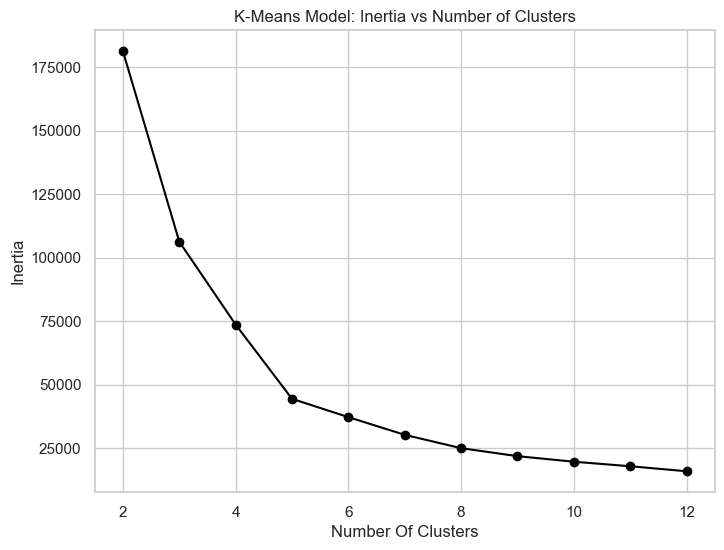

In [29]:
#Create a line plot of inertia_errors vs n_clusters
x_values = list(range(2, 13)) 

plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")  # Set Seaborn style

# Create a line plot using Matplotlib
plt.plot(x_values, inertia_errors, marker='o', linestyle='-', color='black')

# Add labels and title
plt.title('K-Means Model: Inertia vs Number of Clusters')
plt.xlabel('Number Of Clusters')
plt.ylabel('Inertia')

# Turn on grid and show plot
plt.grid(True)
plt.show()

In [14]:
final_model = KMeans(n_clusters=4,random_state=42,n_init=10)
final_model.fit(X)

C:\Users\priya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4, n_init=10, random_state=42)

In [16]:
labels = final_model.labels_
centroids = final_model.cluster_centers_
print(labels[:4])
print(centroids[:4])

[0 3 0 3]
[[26.30434783 20.91304348]
 [86.53846154 82.12820513]
 [87.         18.63157895]
 [48.26       56.48      ]]


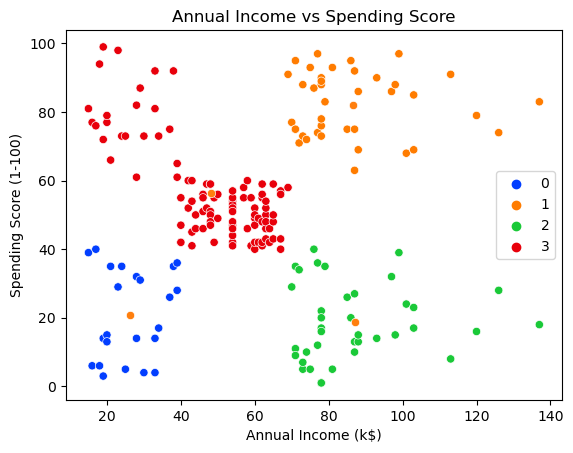

In [17]:
#Plot "Annual Income" vs "Spending Score" with final_model labels
sns.scatterplot(x=df['Annual Income (k$)'],y=df['Spending Score (1-100)'],hue=labels,palette='bright')
sns.scatterplot(
    x = centroids[:,0],
    y = centroids[: ,1]
    )
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.title("Annual Income vs Spending Score");